In [1]:
'''
use numpy and matplotlib and other packages to open and plot a given geotiff file 
'''
# !pip install gdal==3.10.3
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from time import perf_counter

t0 = perf_counter()
filename='/data/fast1/roughness/rema/27_15_2_1_2m_v2.0_dem.tif'

# Open the GeoTIFF file
dataset = gdal.Open(filename)
if dataset is None:
    print(f"Failed to open file: {filename}")
    exit(1)
else:
    print(f"Successfully opened file: {filename}")

# Read the first band
band = dataset.GetRasterBand(1)
data = band.ReadAsArray()

print(f'Data read in {perf_counter()-t0} seconds')

# Get geotransform and projection information
geotransform = dataset.GetGeoTransform()
projection = dataset.GetProjection()

print(f'Projection complete in {perf_counter()-t0} seconds')

# Print geotransform and projection info
print("Geotransform:", geotransform)
print("Projection:", projection)

/home/bpl7/.conda/envs/sliderule-may-2025/lib/python3.11/site-packages/osgeo/gdal.py:314: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Successfully opened file: /data/fast1/roughness/rema/27_15_2_1_2m_v2.0_dem.tif
Data read in 10.840584303252399 seconds
Projection complete in 10.858528259210289 seconds
Geotransform: (-1600100.0, 2.0, 0.0, -299900.0, 0.0, -2.0)
Projection: PROJCS["WGS 84 / Antarctic Polar Stereographic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-71],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",NORTH],AXIS["Northing",NORTH],AUTHORITY["EPSG","3031"]]


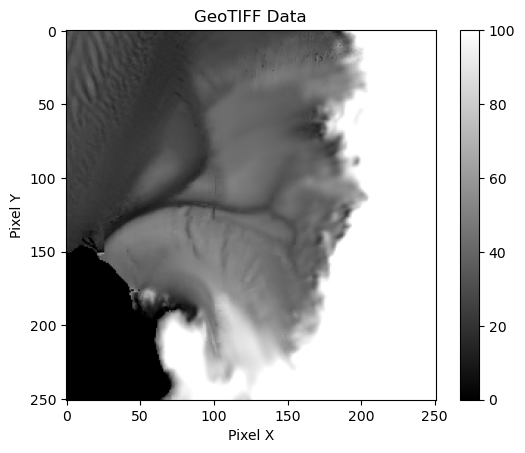

Plotting done after -28.740220803767443 seconds


In [2]:
# Plot the data
plt.imshow(data[::100,::100], cmap='gray',vmin=0,vmax=100)
plt.colorbar()
plt.title('GeoTIFF Data')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()
print(f'Plotting done after {t0-perf_counter()} seconds')

In [4]:
def plot_fft2d(data, title='', dx=1,dy=1):
    '''
    Plot the 2D FFT of the input data.
    '''
    fft_data = np.fft.fft2(data)
    fft_shifted = np.fft.fftshift(fft_data)
    magnitude = np.abs(fft_shifted)

    kx = np.fft.fftshift(np.fft.fftfreq(data.shape[1], d=dx))
    ky = np.fft.fftshift(np.fft.fftfreq(data.shape[0], d=dy))

    plt.subplots(1,2,figsize=(8, 6))
    plt.subplot(1,2,1)
    plt.imshow(data)
    plt.subplot(122)
    plt.imshow(np.log1p(magnitude), cmap='gray',extent=(kx.min(), kx.max(), ky.min(), ky.max()))
    plt.title(title)
    # plt.colorbar(label='Log Magnitude')
    plt.xlabel('Wavenumber X')
    plt.ylabel('Wavenumber Y')
    plt.tight_layout()
    plt.show()

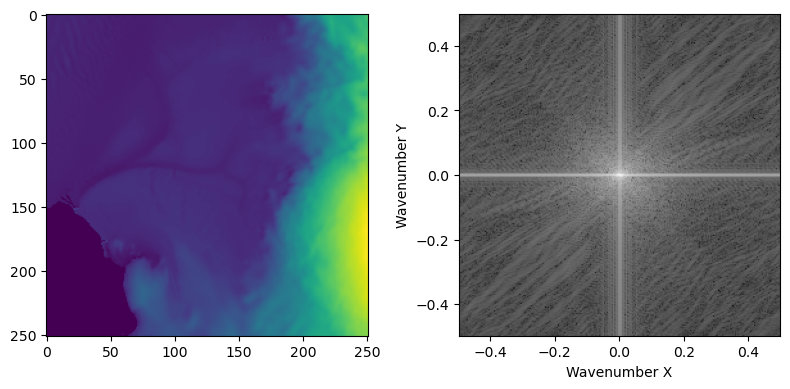

In [5]:
plot_fft2d(data[::100,::100])